# Lead Scoring Case Study

## Problem Statemet

X Education Company wishes to identify the most potential leads, also known as “Hot Leads”. The company needs a model wherein 
a lead score is assigned to each of the leads such that the customer with higher lead score have a higher conversion chance 
and customer with lower lead score have a lower conversion chance. The CEO, has given a number for the lead conversion rate 
i.e. 80% .Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used 
by the company to target potential leads. 

### Step 1: Importing the necessary libraries

In [1]:
# Importing all important and needed libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt,seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### Step 2: Importing and understanding the data

In [2]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Lets check the number of rows and columns
leads.shape

(9240, 37)

In [4]:
# data imbalance
leads.Converted.mean()*100

38.53896103896104

- The rate of conversion of the orginal dataset is around 40% (also known as data imbalance , it is not biased)

In [5]:
# lets check all the column names
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Lets check the summary statistics of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# lets check the overall information of the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Observations:

> As observed, there are more categorical variables than numerical vairables. There is a need of converting categorical vars to dummy variables, as logistic rergression takes only numerical variables for model building. 
Also there seems to be a lot of null values in most of the columns whichc we need to handle.
Outlier analysis to be done once all the above mentioned steps are done.

### Step 3: Data Cleaning

In [8]:
# lets first check the null values and handle them

(leads.isnull().mean()*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

- Observations:

> There are some columns having more than 35% null values, clearly they have to be dropped as they won't be much helpful for furhter analysis as they cant be imputed. 

In [9]:
# lets go ahead and drop the columns having more than 35% null values
for c in leads.columns:
    if (leads[c].isnull().mean()*100) > 35:
        leads.drop(c,axis=1,inplace=True)
        

In [10]:
# lets now check the null values percentage

(leads.isnull().mean()*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

We can see that the columns having more than 35% null values have been removed

In [11]:
# Now lets check the value counts of the rows having more than 15%  null values
for c in leads.columns:
    if (leads[c].isnull().mean()*100) > 15:
        print(leads[c].value_counts())
        print('-------------------------')

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

> As we observe thorugh these value counts, we can see that in City column, Most of the values are concentrated on Mumbai and Select,we can remove this column. Also if we see Country column, Most of thevalues are India and negligible value counts for other countries. therefore we can remove this column too. They wont be much helpful in model building.

> In columns of 'How did you hear about X Education','Lead Profile' there are having level called 'Select', it doesnt make much sense taking this into account, hence we shall remove these cols as well. Althoguh 'Specialization' has select level so many times, it seems to be important column, lets keep it for now


In [12]:
# dropping the sepcified columns(mentioned above)

leads.drop(['City','Country','How did you hear about X Education','Lead Profile'],axis=1,inplace=True)

In [13]:
# Lets once again check the value counts of all the columns
for c in leads.columns:
    print(leads[c].value_counts())
    print('-------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
-------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
-------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-------------------------
Lead Source
Google        

> The columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through  Recommendations','Recieve more Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
> They have only one values No , Hence it doesnt make sense taking these into account for further process, we will go ahead and drop these columns altogether. The distribution between binary values are too skewed, it will make the further analysis biased.

In [14]:
# dropping the above mentioned columns

leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' ],axis=1,inplace=True)

In [15]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [16]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Better Career Prospects,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,Better Career Prospects,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Better Career Prospects,No,Modified


In [17]:
# lets checkc the null values again

(leads.isnull().mean()*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
A free copy of Mastering The Interview            0.000000
Last Notable Activity                             0.000000
dtype: float64

> If we observe the value counts of the column 'What matters most to you in choosing a course' has a value fo 6528 times of 'Better Career Prospects' and around 29% values are null values. Therefore it would be good dropping the entire column going ahead

In [18]:
# dropping the above mentioned column
leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

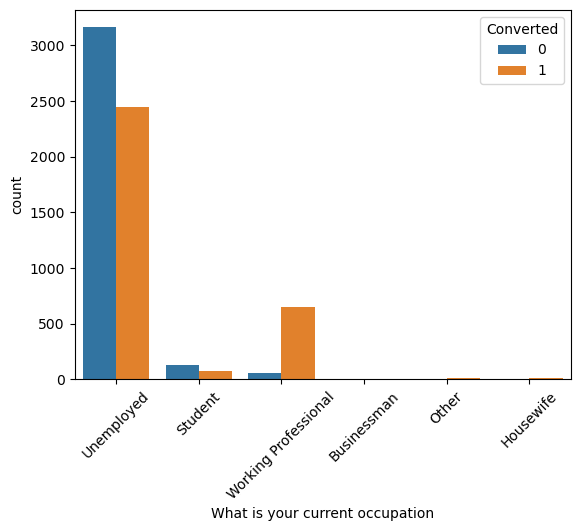

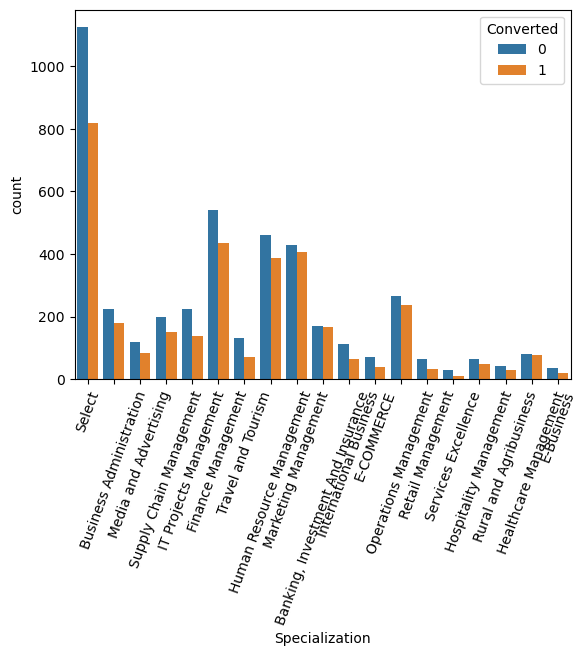

In [19]:
# 'What is your current occupation' and 'Specialization' has null values
# Lets observe their countplot

sns.countplot(data= leads, x='What is your current occupation',hue='Converted')
plt.xticks(rotation=45)
plt.show()
sns.countplot(data=leads, x='Specialization', hue='Converted')
plt.xticks(rotation=70)
plt.show()

In [20]:
# checkin the value counts of converted of the Specialization column having null values
# In order to impute them or with replace them any other value
leads[leads.Specialization.isnull()].Converted.value_counts()

Converted
0    1287
1     151
Name: count, dtype: int64

> We will drop null rows of the columns 'Specilaization', 'What is your current Occupation'

In [21]:
# Drop the null values rows in the column 'Specialization'

leads = leads[~pd.isnull(leads['Specialization'])]

In [22]:
leads.shape[0]/9240

0.8443722943722943

In [23]:
# Drop the null values rows in the column 'What is your current occupation'

leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [24]:
# percentage of the original dataset remaining after dropping null rows
leads.shape[0]/9240*100

70.6926406926407

In [25]:
# checking the data imbalance
leads.Converted.mean()*100

48.851806491120634

In [26]:
# Lets check null value percentage again

(leads.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                               1.990202
Page Views Per Visit                      1.990202
Last Activity                             1.576852
Lead Source                               0.551133
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [27]:
# Drop the null values rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [28]:
# Lets check null value percentage again

(leads.isnull().mean()*100).sort_values(ascending=False)

Lead Source                               0.452983
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               0.000000
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.000000
Last Activity                             0.000000
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [29]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [30]:
# Lets check null value percentage again

(leads.isnull().mean()*100).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [31]:
# percentage of the original dataset remaining after dropping null rows
leads.shape[0]/9240*100

68.97186147186147

In [32]:
# checking the data imbalance
leads.Converted.mean()*100

48.093519535540565

> All the null vallues have been handled, some columns had to be removed, and in some cases where columns seemed important, the null rows have been removed.

> The percentage of the original dataset remaining after dropiing all null values is around 70%, which should be good for furhter processing.

> Also we see that data imbalance has gone from 40% to around 48%, hence it is not biased in any way after data handling of null values.

In [33]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [34]:
# The first two columns 'ProspectID', 'Lead Number' seems irrevelant to model building, as they are just for identity process.
# lets remove these two columns

leads.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [35]:
leads.shape

(6373, 12)

In [36]:
 leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [37]:
var_cols = leads.select_dtypes(include=['object']).columns.tolist()

In [38]:
var_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [39]:
num_cols =  [ i for i in leads.columns if i not in var_cols]
num_cols.remove('Converted')

In [40]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

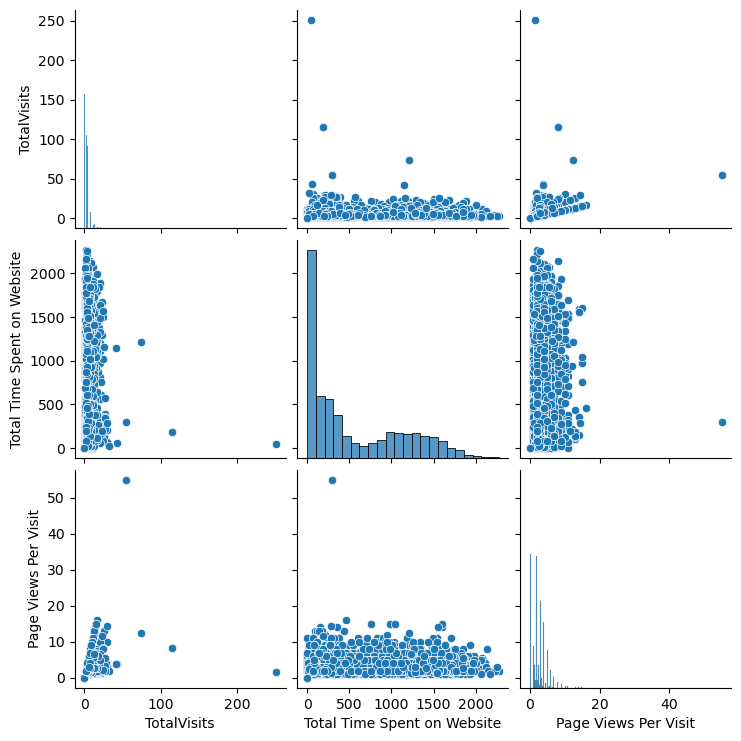

In [41]:
sns.pairplot(leads[num_cols])
plt.show()

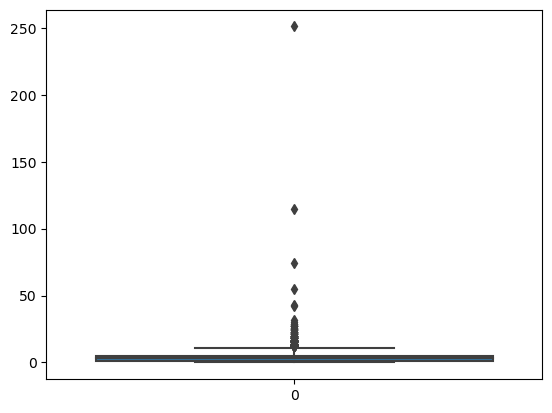

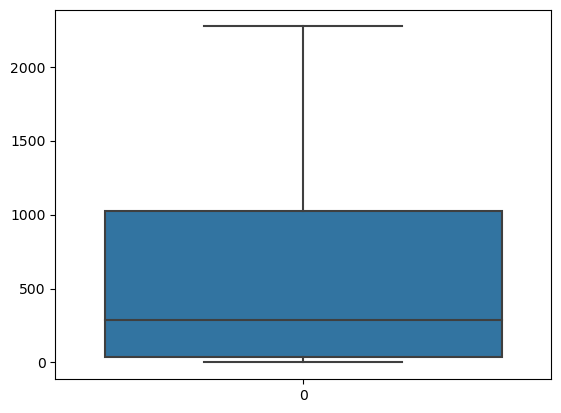

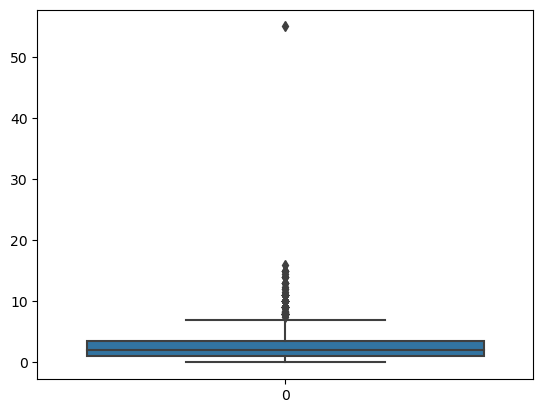

In [42]:
for i in num_cols:
    sns.boxplot(leads[i])
    plt.show()

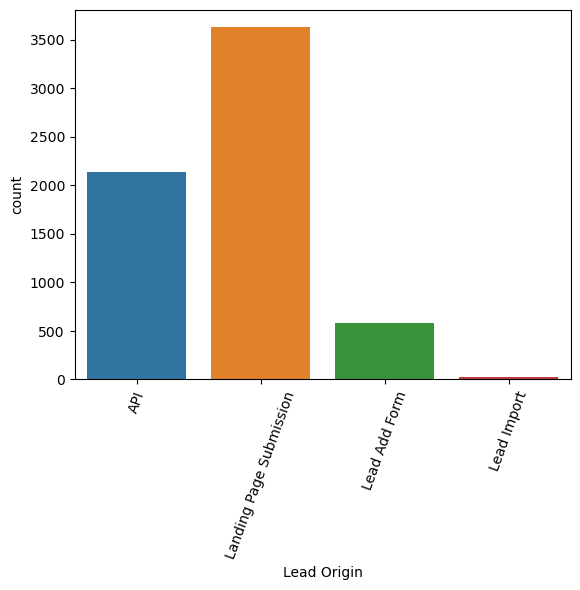

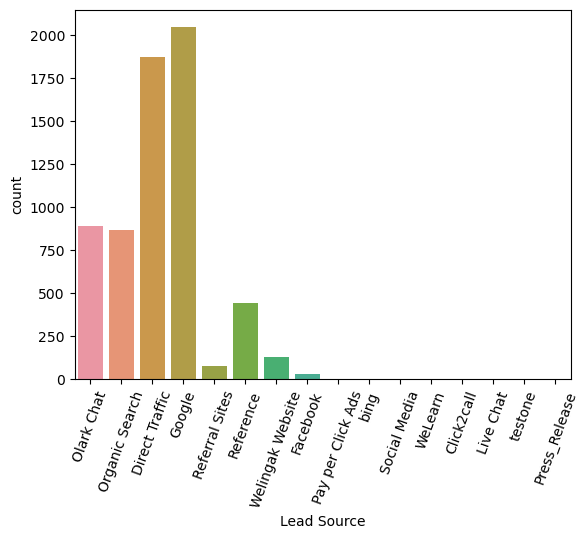

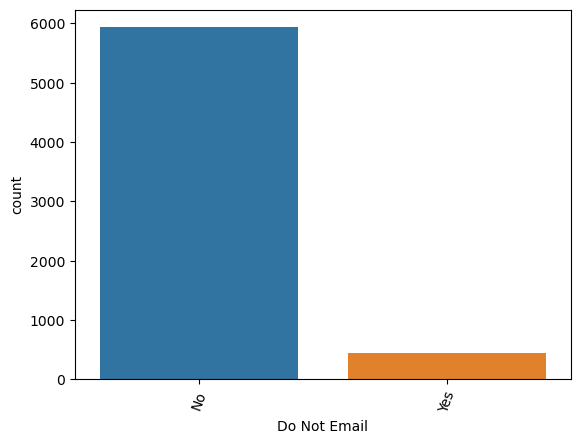

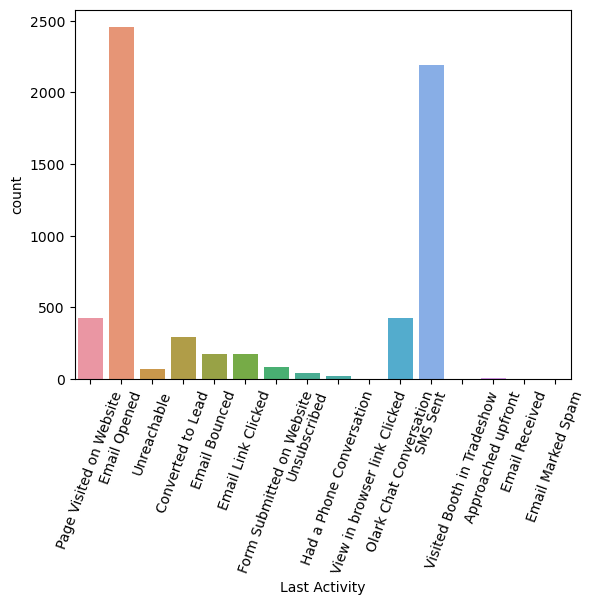

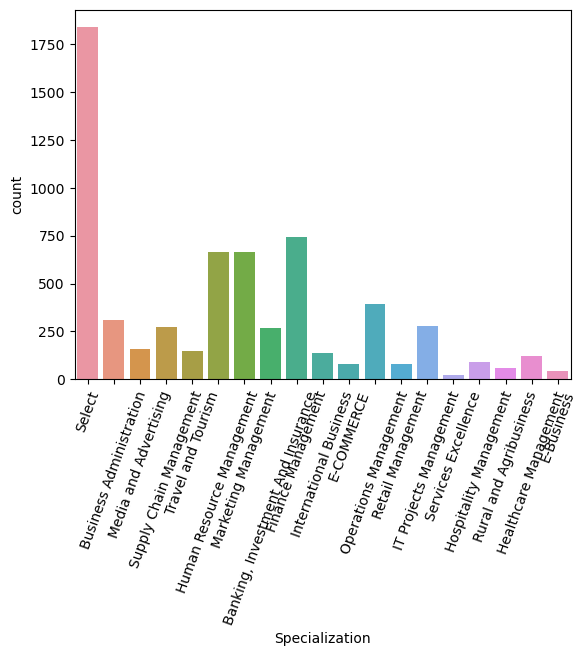

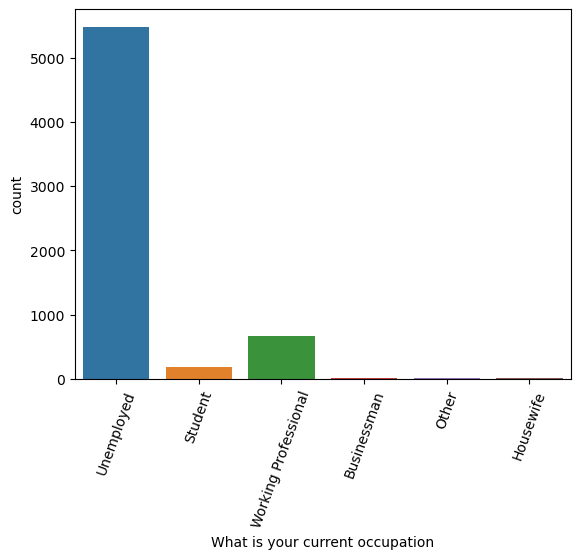

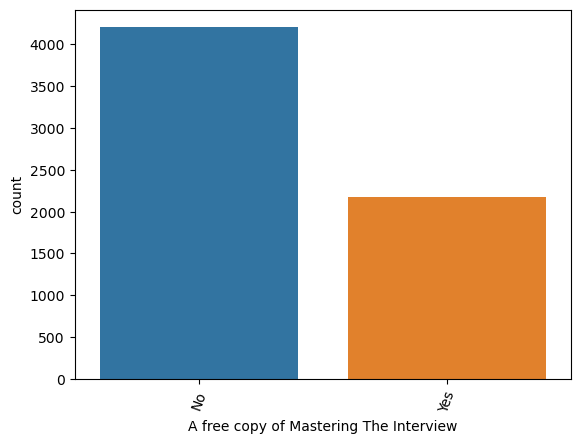

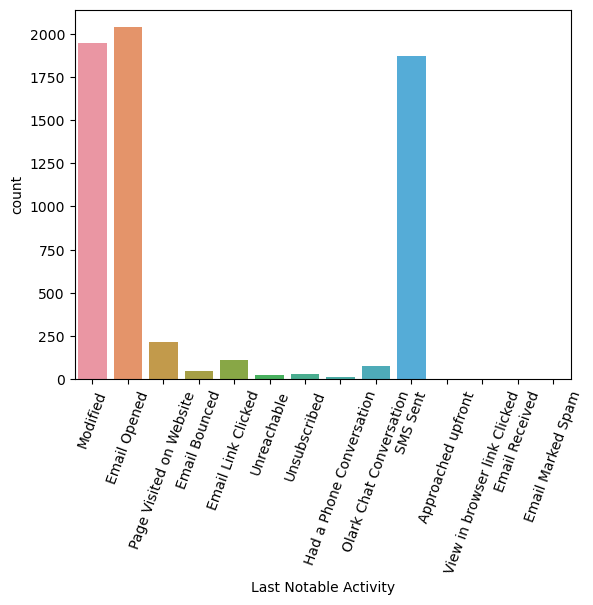

In [43]:
for i in var_cols:
    sns.countplot(leads, x=leads[i])
    plt.xticks(rotation =70)
    plt.show()

## Dummy Variable Creation
- Here we convert all the categorical variables to numerical variables through dummy variable creation 

In [44]:
# the columns 'Do Not Email' and 'A free copy of Mastering The Interview' have binary values of Yes/No
# We can convert these to 0/1
def binary_map(x):
    return x.map({'Yes':1,'No':0})

leads[['Do Not Email','A free copy of Mastering The Interview']] = leads[['Do Not Email','A free copy of Mastering The Interview']].apply(binary_map)

In [45]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


In [46]:
# dummy variable creation 
# Specialization column has a variable Select, we will drop the dummy for it seperately

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization', dtype=int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [47]:
# Creating dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
                              'What is your current occupation', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [48]:
# lets drop the original columns which are redundant now
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                              'What is your current occupation', 
                              'Last Notable Activity','Specialization'],axis=1,inplace=True)

In [49]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


> The data preparation is now done, we will go ahead with the next process splitting the dataset to train and test

### Train-Test Split

In [50]:
# Seperating dependant and independant variable to X and y

X = leads.drop('Converted',axis=1)
y = leads.Converted

In [51]:
# Spliting the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [52]:
# Now that we have split the dataset, we have to scale some of the features in Train set
# The features 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' have to be scaled in order to make the whole data uniform
# We will use MinMaxScaler for scaling these variables as we wanna bring all the values of all features between 0 n 1

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0,0.015936,0.029489,0.125,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
218,0,0.015936,0.082306,0.250,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4171,0,0.023904,0.034331,0.375,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4037,0,0.000000,0.000000,0.000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0,0.000000,0.000000,0.000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection
> As seen, we have upto 74 features to work with, hence we will select the features based on the RFE method

We have to specify which model to be used dfor RFE method, therfore we will have to create a Model objecct, since we are using LogisticRegression model, we will create an object for the same

In [53]:
logreg = LogisticRegression()

rfe = RFE(estimator=logreg,n_features_to_select=15)

rfe = rfe.fit(X_train,y_train)

In [54]:
# Let us have a look at which features were selected through RFE method

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 50),
 ('Specialization_Banking, Investment And Insurance', False, 6),
 ('Specialization_Business Administration', False, 15),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', False, 14),
 ('Specialization_Healthcare Management', False, 10),
 ('Specialization_Hospitality Management', False, 55),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 18),
 ('Specialization_International Business', False, 22),
 ('Specialization_Marketing Management', False, 12),
 ('Specialization_Media and Advertising', False, 21),
 ('Specialization_Operations Management', False, 19),
 ('Specialization_Retail Management', False, 30),
 ('Specialization_Rural and Agribusiness', False, 7),
 ('Specia

In [55]:
rfe_col = X_train.columns[rfe.support_]

In [56]:
rfe_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [57]:
# Taking the selected features only
X_train_rfe = X_train[rfe_col]

## Model Building

- Lets build our first model , we will use statsmodels for it as we are concerned with statistical measures in order to keep refining the model for a better one


### Model-1

In [58]:
X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 21 May 2024   Deviance:                       4145.5
Time:                        15:47:19   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
Do Not Email                                            -1.5053      0.193     -7.781      0.000      -1.884      -1.126
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

> Looks like we have to refine the model by eliminating insignificant features by comparing the p-value and also for VIF for elimianting multicollinearity.

In [59]:
# defining a funtion to check VIF

def check_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [60]:
check_vif(X_train_rfe)

                                             Features    VIF
3                           Lead Origin_Lead Add Form  84.19
5                               Lead Source_Reference  65.18
6                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
2                         Total Time Spent on Website   2.38
1                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
4                              Lead Source_Olark Chat   1.44
0                                        Do Not Email   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01


In [61]:
# Lets compare the p-values and VIF values, those with have , we will eliminate one by one.

# 'Lead Source_Reference' has very high VIF (>>>5) and high p-value(>0.05)

X_train_rfe.drop('Lead Source_Reference',axis=1,inplace=True)

### Model-2

In [62]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 21 May 2024   Deviance:                       4146.5
Time:                        15:47:19   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
Do Not Email                                            -1.5036      0.193     -7.779      0.000      -1.882      -1.125
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [63]:
# checking vif again

check_vif(X_train_rfe)

                                             Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
2                         Total Time Spent on Website  2.38
3                           Lead Origin_Lead Add Form  1.71
1                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
4                              Lead Source_Olark Chat  1.44
5                        Lead Source_Welingak Website  1.33
0                                        Do Not Email  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01


> Observation: The VIF values of all features are now below 5, therfore we will remove the features with high p-vlaues

In [64]:
# The feature 'Last Notable Activity_Had a Phone Conversation' has a very high p-value, lets drop it

X_train_rfe.drop('Last Notable Activity_Had a Phone Conversation',axis=1,inplace=True)

### Model-3

In [65]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 21 May 2024   Deviance:                       4152.2
Time:                        15:47:19   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
Do Not Email                                            -1.5037      0.193     -7.780      0.000      -1.882      -1.125
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

> The feature 'What is your current occupation_Housewife' has a very high p-value, lets drop it

In [66]:
X_train_rfe.drop('What is your current occupation_Housewife',axis=1,inplace=True)

### Model-4

In [67]:
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 21 May 2024   Deviance:                       4156.7
Time:                        15:47:19   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
Do Not Email                                            -1.5063      0.193     -7.785      0.000      -1.886      -1.127
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

> There is still one feature greater than 0.05 i.e 'What is your current occupation_Working Professional' , we'll drop it rebuild the model

In [68]:
X_train_rfe.drop('What is your current occupation_Working Professional',axis=1,inplace=True)

### Model-5

In [69]:
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 21 May 2024   Deviance:                       4158.1
Time:                        15:47:20   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
Do Not Email                                  -1.5037      0.193     -7.774      0.000      -1.883      -1.125
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

> All p values now are less than 0.05, Lets also check the VIF again to clarirfy if they are within 5

In [70]:
check_vif(X_train_rfe)

                                      Features   VIF
9   What is your current occupation_Unemployed  2.82
2                  Total Time Spent on Website  2.00
1                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
3                    Lead Origin_Lead Add Form  1.45
4                       Lead Source_Olark Chat  1.33
5                 Lead Source_Welingak Website  1.30
0                                 Do Not Email  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01


> All the p-values and VIF of the current features are less than 0.05 and 5 respectively.

> So the Model-5 be the final model, Now lets go ahead with the Model Evaluation 

## Model Evaluation

In [71]:
# lets predict the values on train set

y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
dtype: float64

In [72]:
# lets convert this to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546])

In [73]:
# Lets create a dataframe of the actual y_train values with that of predicted values y_train_pred

y_train_pred_final = pd.DataFrame({'Converted':y_train,'Convert_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Convert_Prob
8003,0,0.300117
218,0,0.142002
4171,1,0.127629
4037,1,0.291558
3660,1,0.954795


In [74]:
# lets add another column to y_train_pred_final as Predicted taking 0.5 as default cut-off

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>0.5 else 0)

In [75]:
y_train_pred_final.head()

,Converted,Convert_Prob,Predicted
8003,0,0.300117,0
218,0,0.142002,0
4171,1,0.127629,0
4037,1,0.291558,0
3660,1,0.954795,1


In [76]:
y_train_pred_final.Converted.mean()*100,y_train_pred_final.Predicted.mean()*100

(48.1730553687514, 44.20533512665322)

In [77]:
# lets calculate the various metrics such as Confusion matrix,accuracy score, specificity, sensitivity

confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[1929  383]
 [ 560 1589]]


In [78]:
# lets check the accuracy score
print('Accuracy Score = ',metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

Accuracy Score =  0.7886124187401928


In [79]:
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [80]:
# checking sensitivity
print('Sensitivity = ',TP/(FN+TP))

Sensitivity =  0.739413680781759


In [81]:
# checking specificity
print('Specificity = ',TN/(TN+FP))

Specificity =  0.8343425605536332


> Although the metrics seem to be alright, there is still scope of improvement, therefore we shall go ahead and find the optimal cut-ff

#### Finding the optimal cut-off

> Plot of ROC Curve

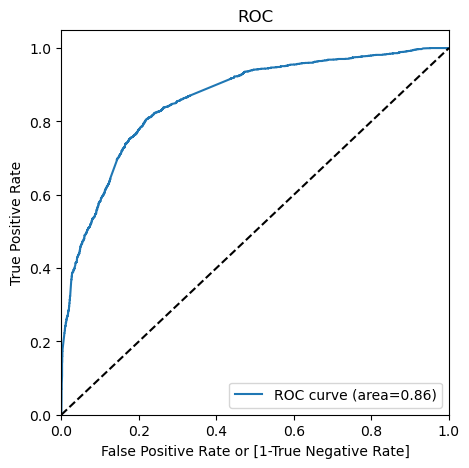

In [82]:
# defining the function to plot the ROC curve

def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

# calling function
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Convert_Prob)

In [83]:
# lets create cols with different probabilty cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()    

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
8003,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
218,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
4171,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
4037,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
3660,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [84]:
# Calculating accuracy,sensitivity and specificity for variuos probabilty cutoffs

cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    speci = cm1[0,0]/(cm1[0,1]+cm1[0,0])
    
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


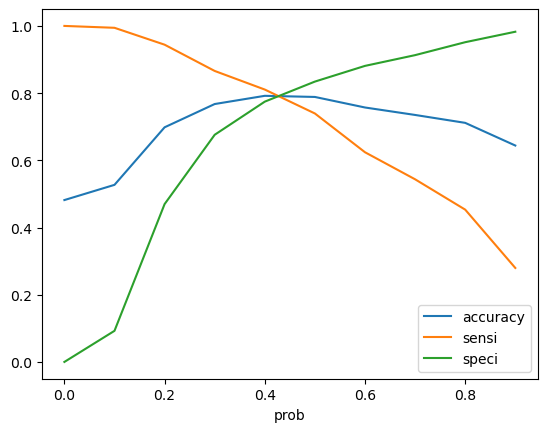

In [85]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

> As observed from the graph, this accuracy,sensitivity and specificity method gives 0.42 as cut-off

> Lets create a dataframe using 0.42 as a cut off value and then calculate the metrics

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final

,Converted,Convert_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
8003,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
218,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
4171,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
4037,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
3660,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8759,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1
100,0,0.759334,1,1,1,1,1,1,1,1,1,0,0,1
5877,0,0.909280,1,1,1,1,1,1,1,1,1,1,1,1
8658,0,0.208249,0,1,1,1,0,0,0,0,0,0,0,0


In [87]:
y_train_pred_final.Converted.mean()*100,y_train_pred_final.Predicted.mean()*100,y_train_pred_final.final_predicted.mean()*100

(48.1730553687514, 44.20533512665322, 49.181797803183144)

In [88]:
# lets calculate the confusion matrix and other metrics

confusion_ = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

TN = confusion_[0,0]
FP = confusion_[0,1]
FN = confusion_[1,0]
TP = confusion_[1,1]

accuracy_score = metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

sensitivity = TP/(FN+TP)
specificity = TN/(FP+TN)

print('Confusion Matrix : ')
print(confusion_)
print('---------------------------------')
print('Accuracy Score = ',accuracy_score)
print('---------------------------------')
print('Sensitivity = ',sensitivity)
print('---------------------------------')
print('Specificity = ',specificity)


Confusion Matrix : 
[[1823  489]
 [ 444 1705]]
---------------------------------
Accuracy Score =  0.7908540685944856
---------------------------------
Sensitivity =  0.793392275476966
---------------------------------
Specificity =  0.7884948096885813


> Looking at all the metrics, 0.42 seems to be a good cut-off to go ahead with

> Next we should go ahead and make predictions on Test set with the final model and this optimal cut-off

## Making Predictions on Test Set

In [89]:
# we have to transform the numerical columns using MinMaxScaler

# Scaling the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 
                                                                                                           'Page Views Per Visit', 
                                                                                                           'Total Time Spent on Website']])

In [90]:
X_test_rfe = X_test[rfe_col]
X_test_rfe.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0,0.000000,0.000000,1,0,1,0,0,1,0,0,0,1,0,0
6122,0,0.027888,0.029049,0,0,0,0,0,0,0,0,1,0,0,0
9202,0,0.015936,0.416813,0,0,0,0,0,1,0,0,1,0,0,0
6570,1,0.011952,0.378961,0,0,0,0,0,1,0,0,1,0,0,0
2668,0,0.031873,0.395246,0,0,0,0,0,1,0,0,1,0,0,0


In [91]:
# droppin all those features which were eliminated while refining the logistic regression model
X_test_rfe.drop(['Lead Source_Reference','Last Notable Activity_Had a Phone Conversation',
                 'What is your current occupation_Housewife','What is your current occupation_Working Professional',
                ],axis=1,inplace=True)

In [92]:
# Make predictions on the test 

y_test_pred = res.predict(sm.add_constant(X_test_rfe))
y_test_pred.head()

4771    0.996296
6122    0.129992
9202    0.703937
6570    0.299564
2668    0.720796
dtype: float64

In [93]:
y_test_pred = y_test_pred.values.reshape(-1)

In [94]:
y_test_pred_final = pd.DataFrame({'Converted':y_test,'Converted_Prob':y_test_pred})

In [95]:
y_test_pred_final.head()

,Converted,Converted_Prob
4771,1,0.996296
6122,0,0.129992
9202,0,0.703937
6570,1,0.299564
2668,1,0.720796


In [96]:
y_test_pred_final['Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x>0.42 else 0)
y_test_pred_final.head()

,Converted,Converted_Prob,Predicted
4771,1,0.996296,1
6122,0,0.129992,0
9202,0,0.703937,1
6570,1,0.299564,0
2668,1,0.720796,1


In [97]:
y_test_pred_final.Converted.mean()*100,y_test_pred_final.Predicted.mean()*100

(47.90794979079498, 48.32635983263599)

In [98]:
# lets calculate the confusion matrix and other metrics for test set

confusion_ = metrics.confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)

TN = confusion_[0,0]
FP = confusion_[0,1]
FN = confusion_[1,0]
TP = confusion_[1,1]

accuracy_score = metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)

sensitivity = TP/(FN+TP)
specificity = TN/(FP+TN)

print('Confusion Matrix : ')
print(confusion_)
print('---------------------------------')
print('Accuracy Score = ',accuracy_score)
print('---------------------------------')
print('Sensitivity = ',sensitivity)
print('---------------------------------')
print('Specificity = ',specificity)


Confusion Matrix : 
[[786 210]
 [202 714]]
---------------------------------
Accuracy Score =  0.7845188284518828
---------------------------------
Sensitivity =  0.7794759825327511
---------------------------------
Specificity =  0.7891566265060241


> The metrics on the Test Set seems to be correct as expected. 

# Therefore  the final logistic regression model would be Model-5 with the optimal cut-off of 0.42